## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
import os
from tomo2mesh.projects.steel_am.rw_utils import *
import seaborn as sns

In [2]:
sns.set(font_scale=1.2)
sns.set_style(style='white')

In [4]:
'/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/voids_data/voids_2k_b_2_subset/'

'/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/voids_data'

In [6]:
voids_1 = Voids().import_from_disk(os.path.join(voids_dir,f"voids_b_1"))

In [8]:
voids_2 = Voids().import_from_disk(os.path.join(voids_dir,f"voids_2k_b_2_subset"))
voids_4 = Voids().import_from_disk(os.path.join(voids_dir,f"voids_2k_b_4_subset"))

In [9]:
s1 = np.sqrt(voids_1["sizes"])*2.34
s2 = np.sqrt(voids_2["sizes"])*2.34
s4 = np.sqrt(voids_4["sizes"])*2.34

(0.0, 40000.0)

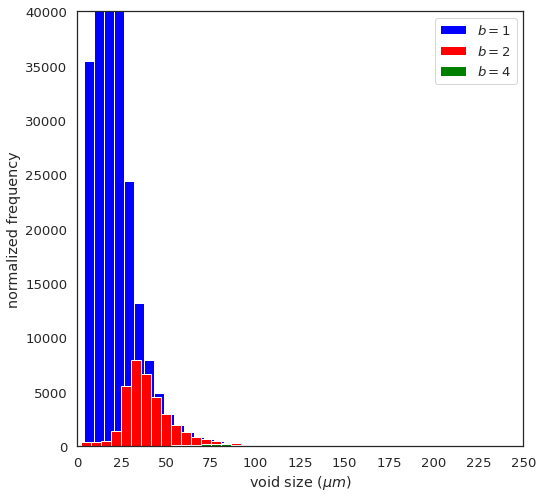

In [12]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
_ = ax.hist(s1[s1>0], bins = 500, density = False, color = 'blue', label = '$b=1$')
_ = ax.hist(s2[s2>0], bins = 500, density = False, color = 'red', label = '$b=2$')
_ = ax.hist(s4[s4>0], bins = 500, density = False, color = 'green', label = '$b=4$')
ax.set_xlim([0,250])
ax.legend()
ax.set_xlabel("void size (${\mu{m}}$)")
ax.set_ylabel("normalized frequency")
ax.set_xticks(np.linspace(0,250,11,endpoint=True))
ax.set_ylim([0,40000])